In [1]:
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df_og = pd.read_csv('superstore_data.csv')

In [3]:
df = df_og.copy()

# Data Quality Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [6]:
df.shape

(2240, 22)

In [7]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [8]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [10]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.Dt_Customer = df.Dt_Customer.dt.tz_localize(None)

In [11]:
df.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [12]:
max_date = df.Dt_Customer.max()
print(max_date)

2014-12-06 00:00:00


# Data Wrangling

In [13]:
# Reformatting column names for ease of analysis
df.columns = ['id', 'birthyear', 'education', 'marital', 'income', 'kidhome', 'teenhome', 'register_date', 'recency', 'wine', 'fruit', 'meat', 'fish', 'sweet', 'gold', 'deals', 'web_purchase', 'catalog_purchase', 'store_purchase', 'web_visits_30d', 'response', 'complain']

In [14]:
df.dropna(inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2216 non-null   int64         
 1   birthyear         2216 non-null   int64         
 2   education         2216 non-null   object        
 3   marital           2216 non-null   object        
 4   income            2216 non-null   float64       
 5   kidhome           2216 non-null   int64         
 6   teenhome          2216 non-null   int64         
 7   register_date     2216 non-null   datetime64[ns]
 8   recency           2216 non-null   int64         
 9   wine              2216 non-null   int64         
 10  fruit             2216 non-null   int64         
 11  meat              2216 non-null   int64         
 12  fish              2216 non-null   int64         
 13  sweet             2216 non-null   int64         
 14  gold              2216 n

In [16]:
# Drop any duplicate user ID
df.drop_duplicates('id', inplace = True)

In [17]:
# Replace obscure marital status
df.marital.replace('Together', 'Married', inplace = True)
df.marital.replace('Alone', 'Single', inplace = True)
df.marital.replace('Absurd', 'Single', inplace = True)
df.marital.replace('YOLO', 'Single', inplace = True)

In [18]:
df.marital.value_counts()

Married     1430
Single       478
Divorced     232
Widow         76
Name: marital, dtype: int64

In [19]:
# Replace obscure education level
df.education.replace('Graduation', 'Bachelor', inplace = True)
df.education.replace('2n Cycle', 'Master', inplace = True)
df.education.replace('Basic', 'Highschool', inplace = True)

In [20]:
df.education.value_counts()

Bachelor      1116
Master         565
PhD            481
Highschool      54
Name: education, dtype: int64

In [21]:
# Calculated account age column using max date and registration date
df['account_age'] = (max_date - df.register_date).dt.days

In [22]:
df.account_age.describe()

count    2216.000000
mean      512.006318
std       232.469034
min         0.000000
25%       340.000000
50%       513.000000
75%       686.000000
max      1063.000000
Name: account_age, dtype: float64

In [23]:
# Get dummy data to replace categorial data columns
df[['Bachelor', 'Master', 'PhD', 'Highschool']] = pd.get_dummies(df['education'])
df[['Married', 'Single', 'Divorced', 'Widow']] = pd.get_dummies(df['marital'])

In [24]:
df.drop(['education', 'marital', 'register_date'], axis = 1, inplace = True)

In [25]:
df.shape

(2216, 28)

In [26]:
df.head()

,id,birthyear,income,kidhome,teenhome,recency,wine,fruit,meat,fish,sweet,gold,deals,web_purchase,catalog_purchase,store_purchase,web_visits_30d,response,complain,account_age,Bachelor,Master,PhD,Highschool,Married,Single,Divorced,Widow
0,1826,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,173,1,0,0,0,1,0,0,0
1,1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,174,1,0,0,0,0,0,1,0
2,10476,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,207,1,0,0,0,0,1,0,0
3,1386,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,31,1,0,0,0,0,1,0,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,124,1,0,0,0,0,0,1,0


# Data Analysis

Let's fit a logistic regression model to classify customers who may purchase the marketing offer (p < 0.05)

In [27]:
df['intercept'] = 1

In [28]:
cols = ['intercept', 'kidhome', 'teenhome', 'recency', 'wine', 'meat', 'fish', 'gold', 'web_purchase', 'catalog_purchase', 'store_purchase', 'account_age']
y = df['response']
X = df[cols]

In [29]:
lm = sm.Logit(y, X)

In [30]:
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.324917
         Iterations 7


In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                 2216
Model:                          Logit   Df Residuals:                     2204
Method:                           MLE   Df Model:                           11
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.2322
Time:                        16:54:27   Log-Likelihood:                -720.02
converged:                       True   LL-Null:                       -937.76
Covariance Type:            nonrobust   LLR p-value:                 1.754e-86
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -2.2663      0.291     -7.784      0.000      -2.837      -1.696
kidhome              0.4118      0.173      2.378      0.017       0.072       0.751
teenhome            -0.9173      0.153     -5.977      0.000      -1.218      -0.617
recency             -0.0261      0.003    -10.204      0.000      -0.031      -0.021
wine                 0.0018      0.000      6.853      0.000       0.001       0.002
meat                 0.0015      0.000      3.635      0.000       0.001       0.002
fish                -0.0033      0.001     -2.227      0.026      -0.006      -0.000
gold                 0.0029      0.001      2.134      0.033       0.000       0.006
web_purchase         0.1051      0.029      3.663      0.000       0.049       0.161
catalog_purchase     0.0863      0.034      2.517      0.012       0.019       0.153
store_purchase      -0.1955      0.029     -6.709      0.000      -0.253      -0.138
account_age          0.0023      0.000      7.468      0.000       0.002       0.003
====================================================================================
"""

# Result Interpretation

e^-2.2663/(1+e^-2.2663) = 0.09395
* intercept = 0.09395 (probability that a completely new customer with no attached family will sign up for the promotion)
* kidhome = e^0.4118 = 1.509
* teenhome = 1/e^-0.9173 = 2.503
* recency = 1/e^-0.0261 = 1.026
* wine = e^0.0018 = 1.002
* meat = e^0.0015 = 1.002
* fish = 1/e^-0.0033 = 1.003
* gold = e^0.0029 = 1.003
* web_purchase = e^0.1051 = 1.111
* catalog_purchase = e^0.0863 = 1.090
* store_purchase = 1/e^-0.1955 = 1.216
* account_age = e^0.0023 = 1.002

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[596  13]
 [ 96  27]]


The confusion matrix shows that we are working with an imbalanced dataset where there are more 0 (no conversion) than 1s (conversion)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       609
           1       0.68      0.22      0.33       123

    accuracy                           0.85       732
   macro avg       0.77      0.60      0.62       732
weighted avg       0.83      0.85      0.82       732



Out of all the results of the classification report above, most of our attention should be focused on the macro avg due to the imbalance of the dataset. (macro avg is useful in imbalanced dataset as it treats all classes equally)

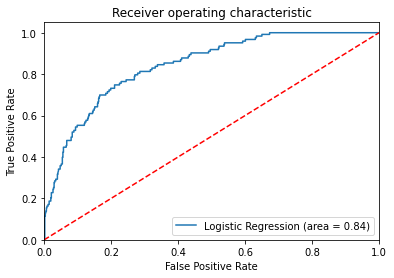

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Lastly, we observe that the AUC is 0.84